# So I heard you wanted to add numbers quantumly

One thing that many of us who use classical computers take for granted is how hard basic arithmetic is to implement.  Well, the joke was on us, because today if we want to develop quantum algorithms, we need to think long and hard about how to do this seemingly simple thing.  We have to think so hard about it because arithemtic is based on taking two inputs and getting only one out -- something VERY not unitary.  This consequence ripples into almost any algorithm we might like to implement in math or physics, and so it is an active area of research in quantum algorithms to design quantum arithmetic. 

In this lab, we will tackle:

Quantum Arithmetic

This has been poorly modified from https://github.com/qiskit-community/qiskit-textbook/blob/main/content/ch-states/atoms-computation.ipynb

Below is some Python code we'll need to run if we want to use the code in this page:

In [3]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

## 1. Review of Bits

Unless we get into a wild paradigm of quantum computing where continuous variable become a reality, we will need to code in terms of <b>finite</b> quantum registers.  At present, most computers use qubits (only 2 computational basis states $|0>$ and $|1>$).  Thus, if we are to perform <b>integer arithmetic</b>, the first thing we will need to do is convert our integers into binary representation which can fit nicely inside of qubits. 

So lets review specifically how binary and bits work. With only 0 and 1, we can represent any piece of information we want if we set the rules properly.

The obvious example is the integers we will use for the rest of this lab. In real life, I have 10 fingers and 10 toes, so I count with decimal representation 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. In this string of digits, each digit represents how many times the number contains a certain <b>power of ten</b>. For example, when you scribble down the number 1989, you are compactly writing


$$ 1000 + 900 + 80 + 9 $$

which can be written in a more useful way for imagining binary latter as:


$$(0\times 10^4) + (1\times10^3) + (9\times10^2) + (8\times10^1) + (9\times10^0) $$


The binary number systems, instead of 0-9 you only get 0-1. This means using multiples of powers of two instead of 10. So in binary, the <b>very special</b> number 1989 is 11111000101.


$$ 1989  = (0 \times 2^{11})+ (1 \times 2^{10}) +(1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) \\\\ \,\,\,   + (1 \times 2^6) + (0 \times 2^5) + (0 \times 2^4) + (0 \times 2^3) + (1 \times 2^2) + (0 \times 2^1) + (1 \times 2^0) $$



In this we are expressing numbers as multiples of 2, 4, 8, 16, 32, etc. instead of 10, 100, 1000, etc.

This is why in classical computing we talk about 8-bit, 16-bit, and 32-bit <b>integers or doubles</b>.  This is telling us how much <b>physical memory</b> we would devote to a given variable. For example: in an n-bit integer register, the largest number you can store is 2^n.

In the next cell, you can play around with the 5-bit encoding of integers. *Apropos of nothing,* you might remember that this is the size of many quantum computers you have been working with. <b>How large an integer can you get?</b>

In [1]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

Reasonable quantum computers today have about <b>20 qubits</b>, if you wanted to add 2 integer registers together, that means <b>10 qubits</b> a piece.  

<b>*In the next cell, can you compute the largest integer available in a 10-qubit register?</b>

<b>*In the next cell, can you compute the size of a qubit register needed to store 1 billion?</b>


So what numbers did you get?

Can you use those numbers to determine <b>how many</b> qubits you need to have an <b>array of 1000 32-bit integers</b>?

"Umm, Hank!  I'm nervous," you are hopefully thinking.  "Quantum computers today have 20 qubits total, so <b>at best</b> I can compute a pretty paltry sum"




Yup!  In the day-to-day of a quantum computing researcher, this is one of the many reasons why we constantly mumble about "our precious qubits."  Unlike classical computing, in the current age of quantum computing if you want to do any algorithm you have to think about memory management very closely.

These **bit-strings** can be used to represent more than just numbers. For example, there is a way to represent "any" english text using bits with at most 8 bits using [this table](https://www.ibm.com/support/knowledgecenter/en/ssw_aix_72/com.ibm.aix.networkcomm/conversion_table.htm). Though these are arbitrary and require extensions if you want emojis or other languages characters, this is a widely agreed-upon standard.

This is how <b>all</b> information is represented in computers. Whether numbers, letters, selfies, or TikToks....its bit-strings all the way down.

Like our standard digital computers, quantum computers are based on this same basic idea. The main difference is that they use *qubits*.  

Now, I would be a bad SQMS employee to fail to mention that you didn't have to chose bits and qubits.  You could have chosen any dit with any number of states.  Early on in classical computing, people consider trits, (physical memory with 0,1,2 accessible).  Extensions of these to qudits are presently being considered as the architecture of quantum hardware.

In a circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. For your first quantum circuit, we'll focus on the last of these jobs. We start by creating a circuit with eight qubits and eight outputs.

In [4]:
qc_output = QuantumCircuit(8)

This circuit, which we have called `qc_output`, is created by Qiskit using `QuantumCircuit`. The `QuantumCircuit` takes the number of qubits in the quantum circuit as an argument. 

The extraction of outputs in a quantum circuit is done using an operation called `measure_all()`. Each measurement tells a specific qubit to give an output to a specific output bit. The command `qc_output.measure_all()` adds a measurement to each qubit in the circuit `qc_output`, and also adds some classical bits to write the output to.

In [5]:
qc_output.measure_all()

Now that our circuit has something in it, let's take a look at it.

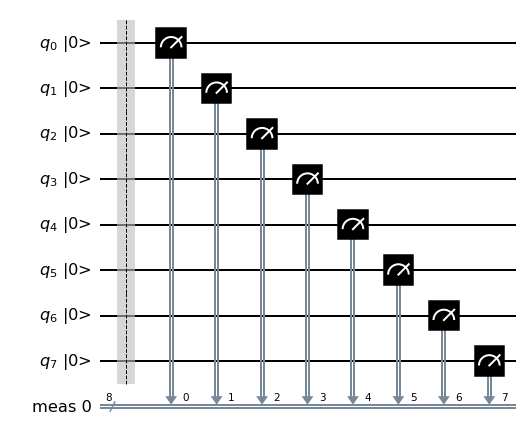

In [6]:
qc_output.draw(initial_state=True) 

Qubits are always initialized to give the output ```0```. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them. We can see this by running the circuit many times and plotting the results in a histogram. We will find that the result is always ```00000000```: a ```0``` from each qubit.

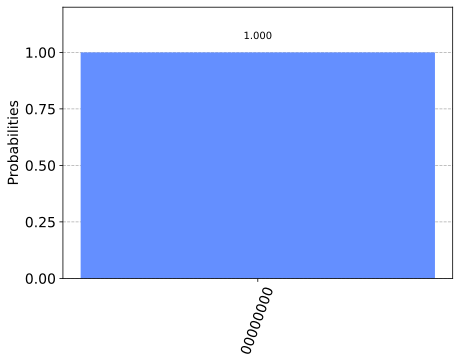

In [6]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

The reason for running many times and showing the result as a histogram is because quantum computers may have some randomness in their results. In this case, since we aren’t doing anything quantum, we get just the ```00000000``` result with certainty.

Note that this result comes from a quantum simulator, which is a standard computer calculating what an ideal quantum computer would do. Simulations are only possible for small numbers of qubits (~30 qubits), but they are nevertheless a very useful tool when designing your first quantum circuits. To run on a real device you simply need to replace ```Aer.get_backend('aer_simulator')``` with the backend object of the device you want to use. 

## Creating an Adder Circuit <a id="adder"></a>

Now let's look at how to encode a different binary string as an input. For this, we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: ```0``` becomes ```1``` and ```1``` becomes ```0```. For qubits, it is an operation called ```x``` that does the job of the NOT.

Below you could code the following:
* create a new 8 qubit circuit
* flip the 2nd most signficant bit to a 1 (qubit number 7).  Can you convince yourself this is 128 in binary?
* perform a measurement on all the qubits
* draw the circuit

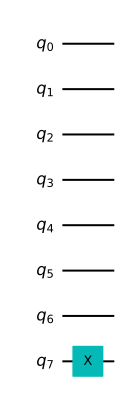

In [7]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()
qc_encode.measure_all()
qc_encode.draw()

Now we can run the combined circuit and look at the results.

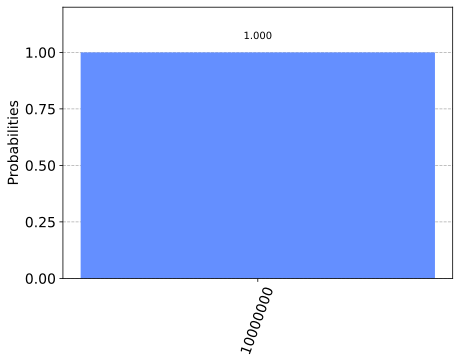

In [9]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Now our computer outputs the string ```10000000``` instead.

The bit we flipped, which comes from qubit 7, lives on the far left of the string. This is because Qiskit numbers the bits in a string from right to left. Some prefer to number their bits the other way around, but Qiskit's system certainly has its advantages when we are using the bits to represent numbers. Specifically, it means that qubit 7 is telling us about how many $2^7$s we have in our number. So by flipping this bit, we’ve now written the number 128 in our simple 8-bit computer.

Now try out writing another number for yourself. You could do your age, for example.

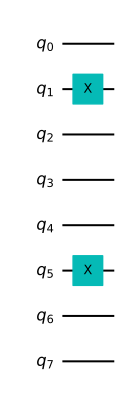

In [10]:
#write some code to convert a decimal to a binary value

#define an 8 qubit circuit
qc_encode = QuantumCircuit(8)

#encode some bit flips to give you the binary representiation of you number

#draw it out
qc_encode.draw()

Now we know how to encode information in a computer. The next step is to process it: To take an input that we have encoded, and turn it into an output that we need.

### 4.2 Remembering how to add <a id="remembering-add"></a>

To look at turning inputs into outputs, we need a problem to solve. As I've told you, addition is actually problematic for quantum computers.  But before we get there, lets review how large mathematical problems are done and break them down into manageable pieces. For example, how would you go about solving the following?

```
   9213
+  1854
=  ????
```

One way is to do it digit by digit, from right to left. So we start with 3+4
```
   9213
+  1854
=  ???7
```

And then 1+5
```
   9213
+  1854
=  ??67
```

Then we have 2+8=10. Since this is a two digit answer, we need to carry the one over to the next column.

```
   9213
+  1854
=  ?067
   ¹ 
```

Finally we have 9+1+1=11, and get our answer

```
   9213
+  1854
= 11067
   ¹ 
```

This may just be simple addition, but it demonstrates the principles behind all algorithms. Whether the algorithm is designed to solve mathematical problems or process text or images, we always break big tasks down into small and simple steps.

To run on a computer, algorithms need to be compiled down to the smallest and simplest steps possible. To see what these look like, let’s do the above addition problem again but in binary.


```
   10001111111101
+  00011100111110
                                    
=  ??????????????
```

Note that the second number has a bunch of extra 0s on the left. This just serves to make the two strings the same length.

Our first task is to do the 1+0 for the column on the right. In binary, as in any number system, the answer is 1. We get the same result for the 0+1 of the second column.

```
   10001111111101
+  00011100111110

=  ????????????11 
```

Next, we have 1+1. As you’ll surely be aware, 1+1=2. In binary, the number 2 is written ```10```, and so requires two bits. This means that we need to carry the 1, just as we would for the number 10 in decimal.

```
   10001111111101
+  00011100111110
=  ???????????011 
             ¹ 
```

The next column now requires us to calculate ```1+1+1```. This means adding three numbers together, so things are getting complicated for our computer. But we can still compile it down to simpler operations, and do it in a way that only ever requires us to add two bits together. For this, we can start with just the first two 1s.

```
   1
+  1
= 10
```

Now we need to add this ```10``` to the final ```1``` , which can be done using our usual method of going through the columns.

```
  10
+ 01
= 11
```

The final answer is ```11``` (also known as 3).

Now we can get back to the rest of the problem. With the answer of  ```11```, we have another carry bit.

```
   10001111111101
+  00011100111110
=  ??????????1011
            ¹¹
```

So now we have another 1+1+1 to do. But we already know how to do that, so it’s not a big deal.

In fact, everything left so far is something we already know how to do. This is because, if you break everything down into adding just two bits, there are only four possible things you’ll ever need to calculate. Here are the four basic sums (we’ll write all the answers with two bits to be consistent).

```
0+0 = 00 (in decimal, this is 0+0=0)
0+1 = 01 (in decimal, this is 0+1=1)
1+0 = 01 (in decimal, this is 1+0=1)
1+1 = 10 (in decimal, this is 1+1=2)
```

This is called a *half adder*. If our computer can implement this, and if it can chain many of them together, it can add anything.

### 4.3 Adding with Qiskit <a id="adding-qiskit"></a>

Let's make our own half adder using Qiskit. This will include a part of the circuit that encodes the input, a part that executes the algorithm, and a part that extracts the result. The first part will need to be changed whenever we want to use a new input, but the rest will always remain the same.

The two bits we want to add are encoded should be the **qubits 0 and 1** of a new circuit. 

The result will be a string of two bits, which we will read out from the **qubits 2 and 3** and store in **classical bits 0 and 1**, respectively. 

All that remains is to fill in the actual program.


The basic operations of computing are known as logic gates. We’ve already used the NOT gate, but this is not enough to make our half adder. We could only use it to manually write out the answers. Since we want the computer to do the actual computing for us, we’ll need some more powerful gates.

To see what we need, let’s take another look at what our half adder needs to do.

```
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10
```

**In the next cell, fill out the table of expected values for each input**

Look at the result qubits?  Can you interpret each of the result qubits in terms of a simple operation?


| Input 1 | Input 2 | Result 1 | Result 2 |
|:-------:|:-------:|:-------:|:---------:|
| 0       | 0       | ???     |  ???      |     
| 0       | 1       | ???     |  ???      |
| 1       | 0       | ???     |  ???      |
| 1       | 1       | ???     |  ???      |

If we look at the second bit, to get this part of our solution correct, we need something that can figure out whether two bits are different or not. Traditionally, in the study of digital computation, this is called an XOR gate (exclusive OR gate).

In quantum computers, the gate that does the same job as XOR gate is done by the CNOT...but whereas the XOR can return an output without changing the two inputs, the CNOT must be a unitary operator, and thus returns qubit 1 and qubit 2, with 2 being changed to match the result of the XOR.

In the next cell, write a **circuit for different two qubit inputs that returns the the XOR result in the second qubit**.  Perform measurements with the simulator to confirm it worked.

Here is a table showing all the possible inputs and corresponding outputs of the CNOT gate:

| Input (q1 q0) | Output (q1 q0) |
|:-------------:|:--------------:|
| 00            | 00             |
| 01            | 11             |
| 10            | 10             |
| 11            | 01             |

Notice this isn't quite the table we made before.

For our *half adder*, we don’t want to overwrite one of our inputs. Instead, we want to write the result on a different pair of qubits. For this, we can use two CNOTs.  Make a **circuit that performs a CNOT with each input qubit controlling a third target qubit**.

We are now halfway to a fully working half adder. We just have the other bit of the output left to do: the one that will live on the forth qubit.

If you look again at the four possible sums, you’ll notice that there is only one case for which this is ```1``` instead of ```0```: ```1+1```=```10```. It happens only when both the bits we are adding are ```1```.

To calculate this part of the output, we could just get our computer to look at whether both of the inputs are ```1```. If they are — and only if they are — we need to do a NOT gate on qubit 3. That will flip it to the required value of ```1``` for this case only, giving us the output we need.

For this, we need a new gate: like a CNOT but controlled on two qubits instead of just one. This will perform a NOT on the target qubit only when both controls are in state ```1```. This new gate is called the *Toffoli*. In Qiskit, the Toffoli is represented with the `ccx` command...because its the controlled-controlled-X gate.

In the next cell, **create the half-adder using 2 CNOTs and 1 Toffoli and test it for the 4 input choices**

Congrats!  You have made 1 half-adder.  If you strung these functions together with a "carry" function, you would be able to perform all the arithmetic that you want, *albeit in not the most efficient way*.  In the cells below, I once again would like you to try **running your half adder on the simulated noisy device**. This can be done by following

https://qiskit.org/documentation/tutorials/simulators/2_device_noise_simulation.html

**BUT** instead of putting in a single pair of input bitstrings, **try sending the $|++>$ state** through your adder?  What do you get?  How bad is the noise?

Now for the cruelty.  If you have written your half-adder as a function, you should be able to string them together.  Can you work out how to string their inputs and outputs together to add 3 qubits?  **Try to make a 3 qubit adder from half-adders in the next cell**  

When you have addtional qubits that used only for computation, like the 2 output qubits of the half-adder, they are sometimes called *ancilla* or *ancillary qubits*.  How many ancilla do you need to add 3 qubit?  What about $N$ qubits?  Does this seem like a fixed cost, or do you think other algorithms could have different ancilla costs?